In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


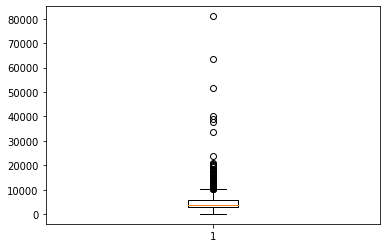

In [8]:
plt.boxplot(dataset['ApplicantIncome'])
plt.show()

In [9]:
# There are outliers present in applicant income

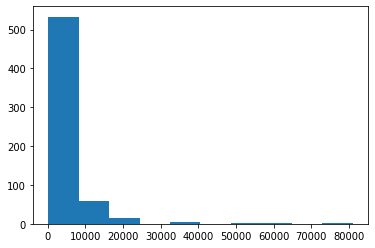

In [10]:
plt.hist(dataset['ApplicantIncome'])
plt.show()

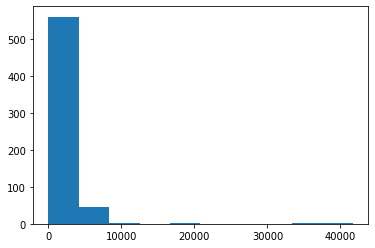

In [11]:
plt.hist(dataset['CoapplicantIncome'])
plt.show()

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Education'>

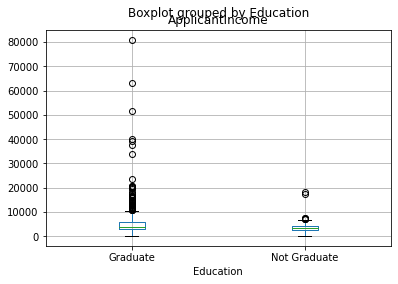

In [12]:
dataset.boxplot(column = 'ApplicantIncome', by = 'Education')

In [13]:
# It is showing Graduates have more income than the non gradutes

<AxesSubplot: >

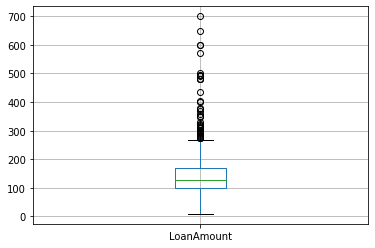

In [14]:
dataset.boxplot(column = 'LoanAmount')

In [15]:
# Outliers also present in loan Amount

<AxesSubplot: >

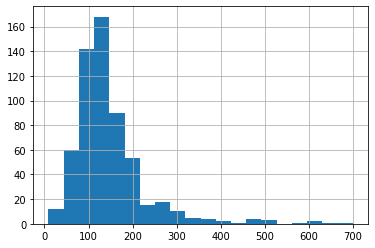

In [16]:
dataset['LoanAmount'].hist(bins=20)

In [17]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])

In [18]:
dataset['LoanAmount_log']

0           NaN
1      4.852030
2      4.189655
3      4.787492
4      4.948760
         ...   
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount_log, Length: 614, dtype: float64

In [19]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [20]:
# Replacing gender value with help of mode

In [21]:
dataset['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [22]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace= True)

In [23]:
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace = True)

In [24]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace = True)

In [25]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace = True)

In [26]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace = True)

In [27]:
dataset['LoanAmount_log'].fillna(dataset['LoanAmount_log'].mean(), inplace = True)

In [28]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace = True)

In [29]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace = True)

In [30]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [31]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [32]:
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])

<AxesSubplot: >

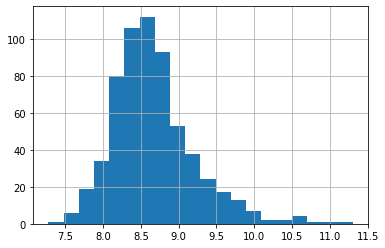

In [33]:
dataset['TotalIncome_log'].hist(bins = 20)

In [34]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
dataset['Gender'] = pd.DataFrame(le.fit_transform(dataset['Gender']))
dataset['Married'] = pd.DataFrame(le.fit_transform(dataset['Married']))
dataset['Education'] = pd.DataFrame(le.fit_transform(dataset['Education']))
dataset['Self_Employed'] = pd.DataFrame(le.fit_transform(dataset['Self_Employed']))
dataset['Property_Area'] = pd.DataFrame(le.fit_transform(dataset['Property_Area']))
dataset['Loan_Status'] = pd.DataFrame(le.fit_transform(dataset['Loan_Status']))

In [54]:
x = dataset.drop(dataset[['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'Loan_Status','TotalIncome_log']], axis = 1)
y = dataset['Loan_Status']

In [55]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    int64  
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    int64  
 9   LoanAmount_log    614 non-null    float64
 10  TotalIncome       614 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 52.9 KB


In [59]:
dataset['Dependents'] = pd.to_numeric(dataset['Dependents'].str.replace('+',''))

AttributeError: Can only use .str accessor with string values!

In [61]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, random_state = 0) # Random state 0 will not change value in each time of execution

In [64]:
print(train_x)

     Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
90        1        1           0          0              0       131.0   
533       1        0           1          0              0       196.0   
452       1        1           0          0              0       149.0   
355       0        0           0          0              0       116.0   
266       1        1           2          0              0       150.0   
..      ...      ...         ...        ...            ...         ...   
277       1        1           0          0              0        80.0   
9         1        1           1          0              0       349.0   
359       1        1           3          0              0       200.0   
192       1        1           0          1              0       160.0   
559       0        1           0          0              0       182.0   

     Loan_Amount_Term  Credit_History  Property_Area  LoanAmount_log  \
90              360.0             1.0  

In [66]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [67]:
train_x = ss.fit_transform(train_x)
test_x = ss.fit_transform(test_x)

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
DTClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
DTClassifier.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [72]:
pred_y = DTClassifier.predict(test_x)
pred_y

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [76]:
from sklearn import metrics
print('The accuracy of decision tree is: ', metrics.accuracy_score(pred_y, test_y))

The accuracy of decision tree is:  0.7154471544715447


In [77]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(train_x, train_y)

GaussianNB()

In [84]:
pred_y = NBClassifier.predict(test_x)

In [85]:
pred_y

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [86]:
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(pred_y, test_y))

The accuracy of Naive Bayes is:  0.8373983739837398
